<a href="https://colab.research.google.com/github/tuanlamdao/datascience/blob/master/10_Manual_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tuanlam import *
iris = datasets.load_iris()
iris_train, iris_test, iris_train_tgt, iris_test_tgt = skms.train_test_split(iris.data, iris.target, test_size=.25)
iris.feature_names = [fn[:-5] for fn in iris.feature_names] 
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


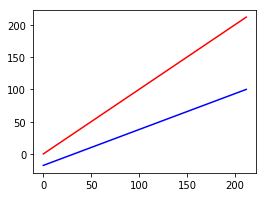

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
f_temps = np.linspace(0,212, 100)
c_temps = (5/9) * (f_temps - 32)
plt.plot(f_temps, f_temps, 'r', f_temps,c_temps, 'b')

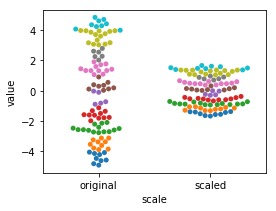

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
original = np.random.uniform(-5,5,100)
scaled = skpre.StandardScaler().fit_transform(original.reshape(-1,1))[:,0]
bins = np.floor(original).astype(np.uint8) + 5
df = pd.DataFrame({'original': original, 'scaled': scaled, 'hue': bins})
df = pd.melt(df,id_vars='hue', var_name='scale')
sns.swarmplot(x='scale',y='value',hue='hue',data=df).legend_.remove()

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
bins = pd.cut(iris_df['sepal width'], np.percentile(iris_df['sepal width'], [25,50,75,100])).cat.codes

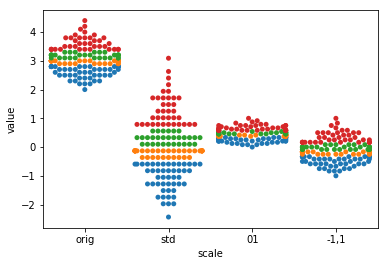

In [ ]:
df = pd.DataFrame({'orig': iris_df['sepal width'], 'hue':bins})
scalers = [('std', skpre.StandardScaler()),('01', skpre.MinMaxScaler()), ('-1,1', skpre.MinMaxScaler((-1,1)))]
for name, scaler in scalers:
    df[name] = scaler.fit_transform(df[['orig']]).reshape(-1)
df = pd.melt(df, id_vars='hue', var_name='scale')
sns.swarmplot(x='scale', y='value', hue='hue', data=df).legend_.remove()

##### Discretization

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
display(iris_df.iloc[[0,50,100]])

NameError: name 'sef' is not defined

,sepal length,sepal width,petal length,petal width,species
0,5.1000,3.5000,1.4000,0.2000,setosa
50,7.0000,3.2000,4.7000,1.4000,versicolor
100,6.3000,3.3000,6.0000,2.5000,virginica


Text(0, 0.5, 'Approximate %')

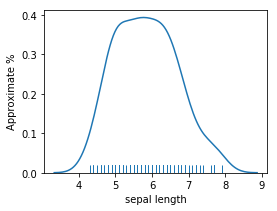

In [ ]:
plt.subplots(1,1,figsize=(4,3))
ax = sns.distplot(iris_df['sepal length'], hist=False, rug=True)
ax.set_ylabel('Approximate %')

In [ ]:
column = iris_df[['sepal length']]
col_mean = column.mean().values
both = column.copy()
both['>Mean'] = skpre.binarize(column, col_mean).astype(np.bool)
print('column mean:', col_mean)
display(both.iloc[[0,50,100]])

column mean: [5.8433]


NameError: name 'sef' is not defined

,sepal length,>Mean
0,5.1000,False
50,7.0000,True
100,6.3000,True


In [ ]:
sep_len_series = iris_df['sepal length']
breaks = [sep_len_series.mean(),sep_len_series.max()]
#print(pd.cut(sep_len_series, breaks)).cat.codes[[0,50,100]]
np.where(column > column.mean(), True, False)[[0,50,100]]

array([[False],
       [ True],
       [ True]])

##### Category Coding

In [ ]:
new_iris_df = pd.DataFrame(iris_df, columns=['petal length', 'petal width','species'])
new_iris_df.columns = pd.MultiIndex([['input ftrs','target ftr'], new_iris_df.columns], [[1,0,0],[0,1,2]])
new_iris_df.sort_index(axis='columns', inplace=True)
display(new_iris_df.iloc[[0,50,100]])

NameError: name 'sef' is not defined

input ftrs                       target ftr
             petal width     species         petal length
0                 0.2000      setosa               1.4000
50                1.4000  versicolor               4.7000
100               2.5000   virginica               6.0000

In [ ]:
print("Numerical categories:", iris.target[[0,50,100]],sep='\n')
sparse = skpre.OneHotEncoder().fit_transform(iris.target.reshape(-1,1))
print("One-hot coding:", sparse[[0,50,100]].todense(), sep="\n")

Numerical categories:
[0 1 2]
One-hot coding:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
encoded = pd.get_dummies(iris_df,prefix="is")
encoded.iloc[[0,50,100]]

NameError: name 'sef' is not defined

,sepal length,sepal width,petal length,petal width,is_setosa,is_versicolor,is_virginica
0,5.1000,3.5000,1.4000,0.2000,1,0,0
50,7.0000,3.2000,4.7000,1.4000,0,1,0
100,6.3000,3.3000,6.0000,2.5000,0,0,1


In [ ]:
encoded_species = pd.get_dummies(iris.target)
encoded_df = pd.merge(iris_df,encoded_species, right_index=True, left_index=True)
encoded_df.iloc[[0,50,100]]

NameError: name 'sef' is not defined

,sepal length,sepal width,petal length,petal width,species,0,1,2
0,5.1000,3.5000,1.4000,0.2000,setosa,1,0,0
50,7.0000,3.2000,4.7000,1.4000,versicolor,0,1,0
100,6.3000,3.3000,6.0000,2.5000,virginica,0,0,1


##### Another way to code and the curious case of the missing intercept

In [ ]:
import patsy.contrasts as pc
levels = iris.target_names
coding = (pc.Treatment(reference=0).code_with_intercept(list(levels)))
print(coding)

ContrastMatrix(array([[1., 0., 0.],
                      [0., 1., 0.],
                      [0., 0., 1.]]),
               ['[setosa]', '[versicolor]', '[virginica]'])


In [ ]:
encoded = patsy.dmatrix('species-1',iris_df,return_type='dataframe')
display(encoded.iloc[[0,50,100]])

NameError: name 'sef' is not defined

,species[setosa],species[versicolor],species[virginica]
0,1.0000,0.0000,0.0000
50,0.0000,1.0000,0.0000
100,0.0000,0.0000,1.0000


In [ ]:
encoded = patsy.dmatrix('species',iris_df,return_type='dataframe')
display(encoded.iloc[[0,50,100]])

NameError: name 'sef' is not defined

,Intercept,species[T.versicolor],species[T.virginica]
0,1.0000,0.0000,0.0000
50,1.0000,1.0000,0.0000
100,1.0000,0.0000,1.0000


##### Patsy models

In [ ]:
pet_data = pd.DataFrame({'pet': ['cat','cat','dog'],'cost':[20,25,40]})
pet_df = pd.get_dummies(pet_data)
display(pet_df)

NameError: name 'sef' is not defined

,cost,pet_cat,pet_dog
0,20,1,0
1,25,1,0
2,40,0,1


##### Model (seemingly) without intercept

In [ ]:
def pretty_coeffs(sk_lr_model, ftr_names):
    lr_coeffs = pd.DataFrame(sk_lr_model.coef_, columns=ftr_names, index=['Coeff'])
    lr_coeffs['intercept'] = sk_lr_model.intercept_
    return lr_coeffs
sk_tgt = pet_df['cost'].values.reshape(-1,1)
sk_ftrs = pet_df.drop('cost', axis='columns')
sk_model = (linear_model.LinearRegression(fit_intercept=False).fit(sk_ftrs, sk_tgt))
display(pretty_coeffs(sk_model, sk_ftrs.columns))

NameError: name 'sef' is not defined

,pet_cat,pet_dog,intercept
Coeff,22.5000,40.0000,0.0000


In [ ]:
import statsmodels as sm
import statsmodels.formula.api as smf
formula = 'cost ~ pet -1'
sm_model = smf.ols(formula, data=pet_data).fit()
display(pd.DataFrame(sm_model.params).T)

NameError: name 'sef' is not defined

,pet[cat],pet[dog]
0,22.5000,40.0000


#### Model with definite intercepts
lets' create the sklearn model, this time with an intercept

In [ ]:
sk_tgt = pet_df['cost'].values.reshape(-1,1)
sk_ftrs = pet_df.drop('cost', axis = 'columns')
sk_model = (linear_model.LinearRegression().fit(sk_ftrs, sk_tgt))
display(pretty_coeffs(sk_model, sk_ftrs.columns))

NameError: name 'sef' is not defined

,pet_cat,pet_dog,intercept
Coeff,-8.7500,8.7500,31.2500


In [ ]:
pet_data_p1 = pet_data.copy()
pet_data_p1['ones'] = 1.0
formula = 'cost ~ (pet - 1) + ones'
sm_model = smf.ols(formula, data=pet_data_p1).fit()
display(pd.DataFrame(sm_model.params).T)

NameError: name 'sef' is not defined

,pet[cat],pet[dog],ones
0,1.6667,19.1667,20.8333


In [ ]:
df = pd.DataFrame({'predicted_sk' : sk_model.predict(sk_ftrs)[:,0], 'predicted_sm' : sm_model.predict(pet_data_p1), 'actual' : sk_tgt[:,0]})
display(df)

NameError: name 'sef' is not defined

,predicted_sk,predicted_sm,actual
0,22.5000,22.5000,20
1,22.5000,22.5000,25
2,40.0000,40.0000,40


##### Solving the riddle
what happen when we specify a pet formula without an intercept. Here is our data including the column of ones

In [ ]:
display(pet_data_p1)

NameError: name 'sef' is not defined

,pet,cost,ones
0,cat,20,1.0000
1,cat,25,1.0000
2,dog,40,1.0000


The encoding for that data without an intercept from the categorical coding gives us

In [ ]:
print('pet - 1 coding')
print(patsy.dmatrix('pet - 1', data=pet_data_p1))

pet - 1 coding
[[1. 0.]
 [1. 0.]
 [0. 1.]]


##### Relationships and Interactions
feature constructions is so powerful. It can actually replace the steps we normally perform in model buildig. Suitably constructed features can mimic the targets we produce when we predict with a model. For example: to move from linear regression to polynomial regression - modelling with curvy shapes - we can either spend a lot of effort defining a custom method that fits a polynomial to data or we can simply create polynomial features and pass them to a standard linear regression fitter 

Manual feature construction:
we know that feature engineering can be very strong in the sense that it can remove the need to learn. Sufficiently powerful discretization and feature construction method can essentially solve learning problem for us.

In [ ]:
xor_data = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]
xor_df = pd.DataFrame(xor_data, columns=['x1','x2','tgt'])
display(xor_df)

NameError: name 'sef' is not defined

,x1,x2,tgt
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


If we try to model xor with a simple linear resgression classifier, things don't work out well. we are getting problems predicting in-sample on the training set- we haven't even see any novel testing data yet

In [ ]:
model = linear_model.LogisticRegression().fit(xor_df[['x1','x2']], xor_df['tgt'])
model.predict(xor_df[['x1','x2']])


array([0, 0, 0, 0])

It is imposible to sue a single line to separate these points and keep them with their like classes only. 

In [ ]:
xor_df['new'] = (-1)**xor_df['x1'] * (-1)**xor_df['x2']
xor_df

NameError: name 'sef' is not defined

,x1,x2,tgt,new
0,0,0,0,1
1,0,1,1,-1
2,1,0,1,-1
3,1,1,0,1


now things are looking pretty nice: even a super simple rule, xor_df['new'] <0 == True will give us our target.

In [ ]:
model = linear_model.LogisticRegression().fit(xor_df[['new']],xor_df['tgt'])
model.predict(xor_df[['new']])

array([0, 1, 1, 0])

So sometime, we need to invent a new vocabulary - constructed column like new to enable our learing systems to learn

##### Interactions
One specific type of constructed feature is an interaction between existing feature. There are 2 ways the features interact: 
1- by working together like a key in a dictionary that selects a class or target value and 
2- by acting together based on their product ( multiplication) instead of their sum (addition) 

In [ ]:
quad_inters = skpre.PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
subset = iris_df.loc[[0,50,100],['sepal length','sepal width']]
new_terms = pd.DataFrame(quad_inters.fit_transform(subset), index=[0,50,100])
new_terms.set_axis(['sep length','sep width','sep area'], axis=1, inplace=True)
display(new_terms)

NameError: name 'sef' is not defined

,sep length,sep width,sep area
0,5.1000,3.5000,17.8500
50,7.0000,3.2000,22.4000
100,6.3000,3.3000,20.7900


##### Notes
your documents for patsy and statsmodels:
https://patsy.readthedocs.org/en/latest/quickstart.html
http://stastmodels.sourceforge.net/devel/example_formulas.html
http://statsmodels.sourceforge.net
data transformation from https://onlinecourses.science.psu.edu/stat501/node/318

##### Target manipulations
Manipulating the input space

In [ ]:
x = np.linspace(1,10,50)
n1 = np.random.normal(size=x.shape)
comparison = pd.DataFrame({"x" : x, "d1" : 2*x+5 + n1, "d2" : 2*x**2 + 5 + n1})
comparison['x'] = x
melted = pd.melt(comparison, id_vars=['x'])

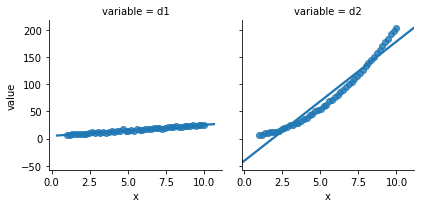

In [ ]:
sns.lmplot(x='x', y='value', data=melted, col='variable', ci=None, size=3)

the model built to relate d1 and x is well behaved, the residuals from the d2 model simply have no obvious relationship to a normal curve

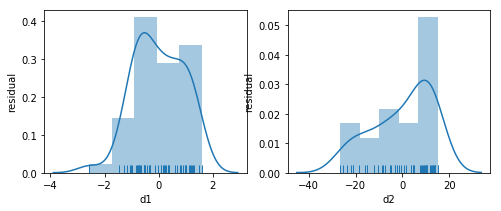

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,3))
for ax, variable in zip(axes, ['d1','d2']):
    predicted = (smf.ols("{} ~ x".format(variable), data=comparison).fit().predict())
    actual = comparison[variable]
    sns.distplot(predicted - actual, norm_hist=True, rug=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('residual')


Text(0, 0.5, 'residual')

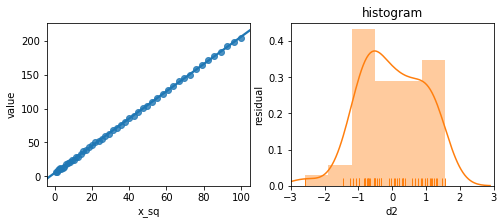

In [ ]:
magic = pd.DataFrame({"d2": 2*x**2+5+n1, "x_sq": x**2})
melted = pd.melt(magic, id_vars=['x_sq'])
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
sns.regplot(x='x_sq', y='value', data=melted, ci=None, ax=ax1)
predicted = (smf.ols("d2 ~ x_sq", data=magic).fit().predict())
actual = comparison['d2']
sns.distplot(predicted - actual, rug=True, norm_hist = True, ax=ax2)
ax2.set_title('histogram')
ax2.set_xlim(-3,3)
ax2.set_ylim(0,.45)
ax2.set_ylabel('residual')

By manipulating the feature, we can adjust for unusual - nonlinear relationship between features and target

##### Manipulating the target
we can do a similar exercise that makes it clear when we should try to manipulate the target. Here, we will inject different types of noise into our relationship

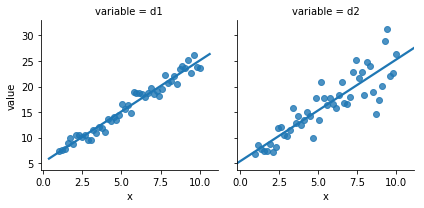

In [ ]:
x = np.linspace(1,10,50)
n1 = np.random.normal(size=x.shape)
n2 = .5*x*np.random.normal(size=x.shape)
comparison = pd.DataFrame({"x": x, "d1": 2*x+5+n1,"d2": 2*x+5+n2})
comparison['x'] = x
melted = pd.melt(comparison, id_vars=['x'])
sns.lmplot(x='x', y='value', data=melted, col='variable', ci=None,size=3)

something seems to be distinctly off with the right graph d2, the error - the vertical distance from the point to the line - are increasing in magnitude as x increase. Here is a histogram of the residuals for d1 and d2

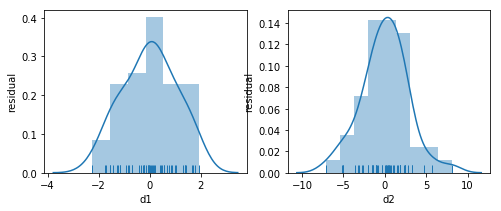

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(8,3))
for ax, variable in zip(axes, ['d1','d2']):
    predicted = (smf.ols("{} ~ x".format(variable), data=comparison).fit().predict())
    actual = comparison[variable]
    sns.distplot(predicted - actual, norm_hist=True, rug=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('residual')
    

Text(0, 0.5, 'residual')

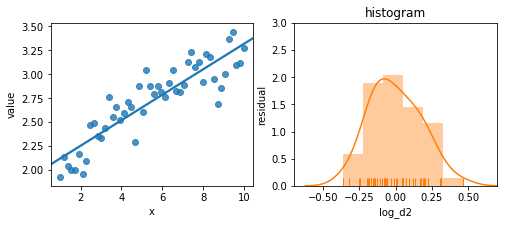

In [ ]:
magic = pd.DataFrame({"log_d2": np.log(comparison['d2']),"x":x})
melted = pd.melt(magic, id_vars=['x'])
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
sns.regplot(x='x',y='value',data=melted,ci=None,ax=ax1)
predicted = (smf.ols("log_d2 ~ x",data=magic).fit().predict())
actual = magic['log_d2']
sns.distplot(predicted - actual, rug=True, ax=ax2)
ax2.set_title('histogram')
ax2.set_xlim(-.7,.7)
ax2.set_ylim(0,3)
ax2.set_ylabel('residual')

The residuals are pretty well behaved now, you won't always see this sort of improvements from simple transformation. But they are easy to try and we might get some improvement from them